# Data Science Job Salary Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = "D:\datasets\data science salaries\ds_salaries.csv"

In [3]:
df = pd.read_csv(filename)
df

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## About this file

The Data Science Salaries Dataset provides insights into the compensation trends within the field of data science across various industries, locations, experience levels, and job roles. This dataset typically includes information such as:

Job Title/Role: Descriptive labels indicating the specific position or role within the data science field, such as Data Scientist, Data Analyst, Machine Learning Engineer, etc.

Salary: Numeric values representing the annual or monthly compensation for each position. Salaries may be reported in different currencies and formats (e.g., gross salary, base salary, total compensation including bonuses and benefits).

Location: Geographic location where the job is based, often categorized by country, city, or region. Location can significantly influence salary levels due to variations in cost of living and demand for data science talent.

Experience Level: Information about the level of experience required or possessed by individuals in each role. This may include categories like entry-level, mid-level, senior-level, or years of experience in the field.

Education Level: The educational background or qualifications typically expected for each role, such as bachelor's degree, master's degree, PhD, or relevant certifications.

Skills and Technologies: Listing of specific skills, tools, programming languages, and technologies relevant to each role. This can include proficiency in programming languages like Python or R, knowledge of machine learning algorithms, experience with data visualization tools, and familiarity with database systems.

Industry: Classification of the industry or sector in which the job is situated, such as technology, finance, healthcare, retail, etc.

Company Size: Information about the size of the employing company, often categorized by the number of employees or revenue.

Benefits and Perks: Additional non-monetary benefits or perks offered to employees, such as stock options, health insurance, flexible work arrangements, and professional development opportunities.

Survey Source: Information about the source of the salary data, such as surveys conducted by industry associations, job boards, recruitment agencies, or companies themselves.

The Data Science Salaries Dataset serves as a valuable resource for job seekers, employers, researchers, and policymakers to understand the compensation landscape within the data science industry, identify emerging trends, benchmark salaries, and make informed decisions related to talent acquisition, career development, and compensation strategy.

In [4]:
pd.DataFrame(df['employment_type'].unique())

,0
0,FT
1,CT
2,PT
3,FL


## Understanding the variables

**FT** :- Full-Time \
**CT** :- Contractual \
**PT** :- Part-time \
**FL** :- Freelancer

In [5]:
pd.DataFrame(df['experience_level'].unique())

,0
0,MI
1,SE
2,EN
3,EX


**MI** :- Mid-Level \
**SE** :- Senior Level \
**EN** :- Entry Level \
**EX** :- Executive Level

In [6]:
pd.DataFrame(sorted(df['job_title'].unique())).head(5)

,0
0,3D Computer Vision Researcher
1,AI Scientist
2,Analytics Engineer
3,Applied Data Scientist
4,Applied Machine Learning Scientist


There are 50 different job title in the data. **Cool!**


In [7]:
pd.DataFrame(df['company_size'].unique())

,0
0,L
1,S
2,M


In [8]:
df.shape

(607, 12)

**L** :- company that have 1000+ employees. \
**M** :- company that have 100-999 employees. \
**S** :- company that have 26-99 employees.

In [9]:
pd.DataFrame(df['work_year'].value_counts())

,work_year
2022,318
2021,217
2020,72


2022 have the most count of data related jobs. Notice that, the count in 2021 tripled prior to that year.

In [12]:
job_202X = df['work_year'].value_counts()

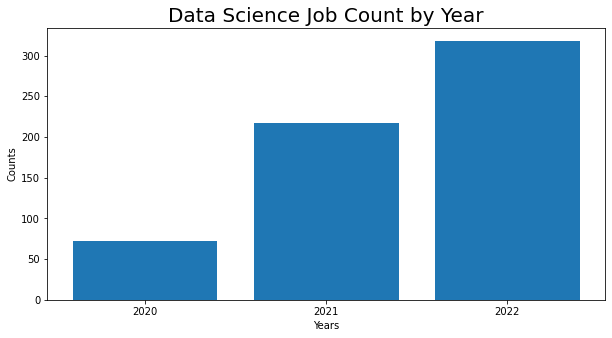

In [13]:
plt.figure(figsize=(10,5))

plt.bar(job_202X.index,job_202X)

plt.title("Data Science Job Count by Year", size=20 )
plt.xlabel("Years", size=10)
plt.xticks(job_202X.index)
plt.ylabel("Counts", size=10)

plt.show()

As shown in the data, there has been an increase of Data Science Jobs throughout the year. There are 72, 217 and 318 Jobs for 2020, 2021 and 2022, respectively. The count of Data related jobs tripled in 2021. 

In [14]:
title_count = df['job_title'].value_counts()

There are too many in the list. We are going to limit the list into the top 10 only and merge the others.

In [15]:
df_title = pd.DataFrame(
    data = {'job_title': title_count.index, 'count' : title_count},
    ).sort_values('count', ascending = False)

#the top 5
df_title2 = df_title[:10].copy()

#others
new_row = pd.DataFrame(data = {
    'job_title' : ['Others'],
    'count' : [df_title['count'][10:].sum()]
})

#combining top 5 with others
df_title3 = pd.concat([df_title2, new_row])

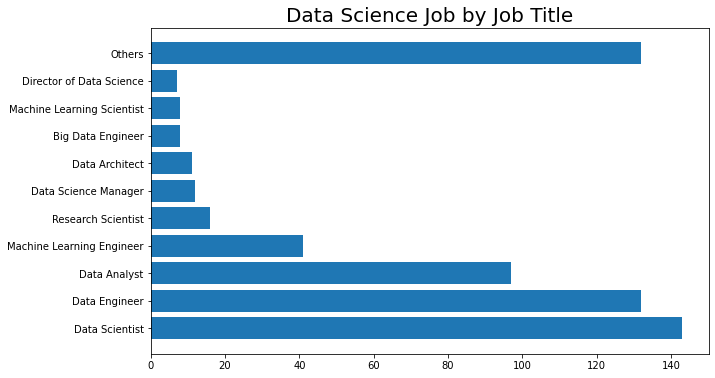

In [16]:
plt.figure(figsize=(10,6))
plt.barh(df_title3['job_title'], df_title3['count'])

plt.title("Data Science Job by Job Title", size=20)

plt.show()

Out of the 50 different Job titles, Data scientist has the most count with 143. Safe to assume that it is the most demanded job.

In [ ]:
exp_level = df['experience_level'].value_counts()
exp_level

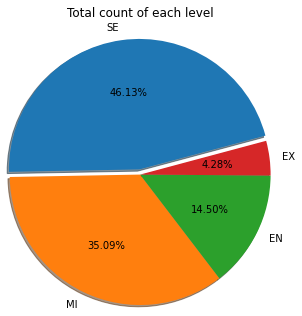

In [125]:
plt.title("Total count of each level", y=1.2)
explode=(0.06, 0, 0, 0)
plt.pie(exp_level,explode=explode, labels=exp_level.index, shadow=True, autopct='%1.2f%%', radius=1.5, startangle=15)

plt.show()

In [ ]:
SE = df.loc[(df['experience_level']) == 'SE'][['work_year', 'experience_level']].groupby('work_year').count()
MI = df.loc[(df['experience_level']) == 'MI'][['work_year', 'experience_level']].groupby('work_year').count()
EN = df.loc[(df['experience_level']) == 'EN'][['work_year', 'experience_level']].groupby('work_year').count()
EX = df.loc[(df['experience_level']) == 'EX'][['work_year', 'experience_level']].groupby('work_year').count()

SE = SE['experience_level']
MI = MI['experience_level']
EN = EN['experience_level']
EX = EX['experience_level']

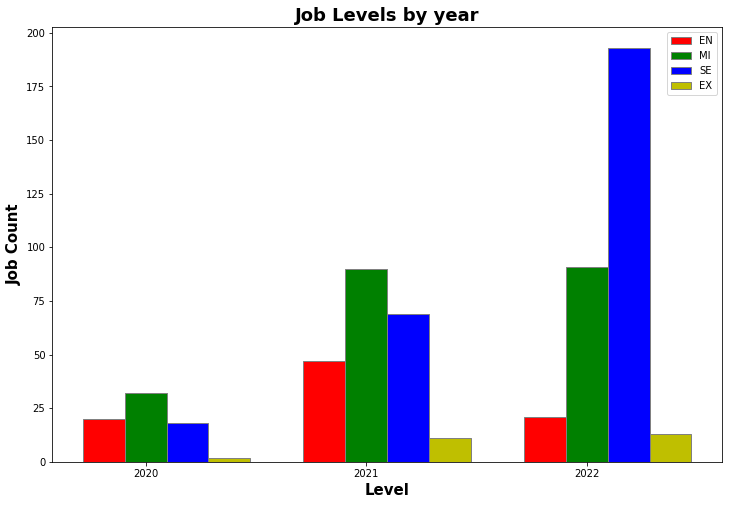

In [18]:
barWidth = 0.19
fig = plt.subplots(figsize =(12, 8)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(SE))
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, EN, color ='r', width = barWidth, 
        edgecolor ='grey', label ='EN') 
plt.bar(br2, MI, color ='g', width = barWidth, 
        edgecolor ='grey', label ='MI') 
plt.bar(br3, SE, color ='b', width = barWidth, 
        edgecolor ='grey', label ='SE') 
plt.bar(br4, EX, color ='y', width = barWidth, 
        edgecolor ='grey', label ='EX') 
 
# Adding Xticks 
plt.xlabel('Level', fontweight ='bold', fontsize = 15) 
plt.ylabel('Job Count', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(SE))], 
        ['2020', '2021', '2022'])
plt.title("Job Levels by year", fontweight='bold', fontsize=18)
plt.legend()
plt.show()

In 2020 and 2021, Middle Level Data related Jobs had the most count but this was overtaken in 2022 by Senior Level atleast doubling the count of Middle Level. Executive level Job is also has the least count in 3 consecutive years.

In [19]:
#List the top 5 job roles that has the most count
job_role = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist']

#Query only these roles in the main dataframe
role_df=df.apply(lambda row: row[df['job_title'].isin([x for x in job_role])])

#Group the data by job titles and take the mean of their salary in usd then sort it descendingly.
roles_salary=role_df[['job_title','salary_in_usd']].groupby('job_title').mean().sort_values('salary_in_usd', ascending=False)
roles_salary

,salary_in_usd
job_title,
Data Engineer,112725.000000
Research Scientist,109019.500000
Data Scientist,108187.832168
Machine Learning Engineer,104880.146341
Data Analyst,92893.061856


In the table above, Data Engineers have the highest average salary and Data Analyst being the least.

In [20]:
#Query the mean salary of the top 5 job roles
roles_salary2=role_df[['job_title','salary_in_usd','work_year']].groupby(['job_title', 'work_year']).mean()

#Mean salary of Data Analyst
DA=roles_salary2.iloc[:3].sort_values('salary_in_usd', ascending=False)

#Mean salary of Data engineer
DE=roles_salary2.iloc[3:6].sort_values('salary_in_usd', ascending=False)

#Mean salary of Data Scientist
DS=roles_salary2.iloc[6:9].sort_values('salary_in_usd', ascending=False)

#Mean salary of Machine Learning Engineer
MLE=roles_salary2.iloc[9:12].sort_values('salary_in_usd', ascending=False)

#Mean salary of Research Scientist
RS=roles_salary2.iloc[12:15].sort_values('salary_in_usd', ascending=False)

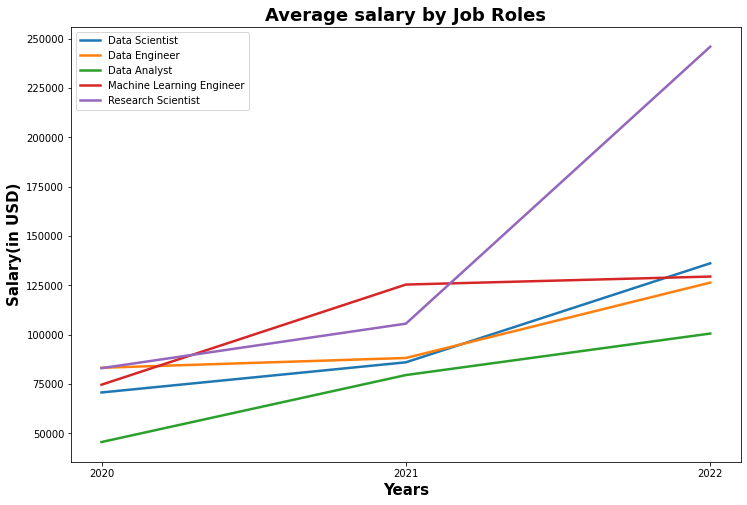

In [21]:
work_years = ['2022', '2021', '2020']

fig = plt.subplots(figsize=(12,8))

plt.plot(work_years, DS, linewidth=2.5)
plt.plot(work_years, DE, linewidth=2.5)
plt.plot(work_years, DA, linewidth=2.5)
plt.plot(work_years, MLE, linewidth=2.5)
plt.plot(work_years, RS, linewidth=2.5)

#invert the x axis
plt.gca().invert_xaxis()

#adding labels
plt.xlabel("Years", fontweight='bold', fontsize=15)
plt.ylabel("Salary(in USD)", fontweight='bold', fontsize=15)
plt.title("Average salary by Job Roles", fontweight='bold', fontsize=18)


plt.legend(job_role)
plt.show()

In [22]:
#group the data by company size
comp_size=df.groupby('company_size').count()[['id']]

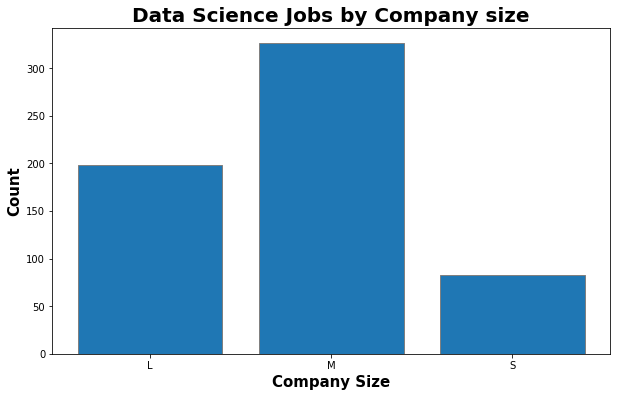

In [23]:
fig = plt.subplots(figsize=(10,6))

plt.bar(comp_size.index, comp_size['id'], edgecolor='grey')

plt.xlabel("Company Size", fontweight='bold', fontsize=15)
plt.ylabel("Count", fontweight='bold', fontsize=15)
plt.title("Data Science Jobs by Company size", fontweight='bold', fontsize=20)

plt.show()

Medium sized company have the most count of data related jobs while small sized company have the least.

In [24]:
#group the data by company sizes and take their median salary
salary_comp_size=df[['company_size','salary_in_usd']].groupby('company_size').mean()

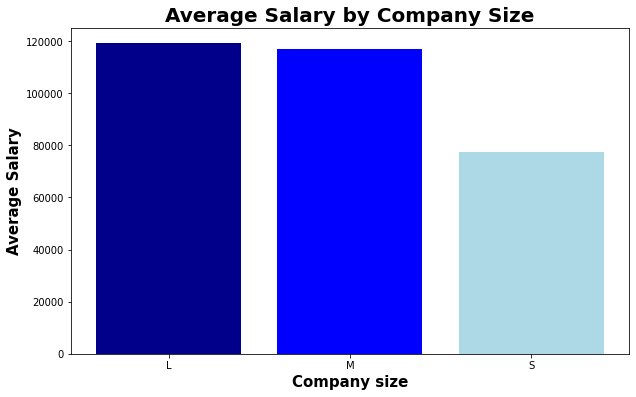

In [25]:
fig=plt.subplots(figsize=(10,6))

colors=['DarkBlue', 'Blue', 'lightblue']
plt.bar(salary_comp_size.index, salary_comp_size['salary_in_usd'], color=colors)

plt.xlabel("Company size", fontweight='bold', fontsize=15)
plt.ylabel("Average Salary", fontweight='bold', fontsize=15)

plt.title("Average Salary by Company Size", fontweight='bold', fontsize=20)

plt.show()

Large companies have better median salaries than the other 2.

In [126]:
#Locate the data for data scientist, data engineer and data analyst
df_DS=df.loc[(df['job_title']) == 'Data Scientist']
df_DE=df.loc[(df['job_title']) == 'Data Engineer']
df_DA=df.loc[(df['job_title']) == 'Data Analyst']

#then group them in company size then take their mean
df_DS2=df_DS.groupby('company_size').mean()
df_DE2=df_DE.groupby('company_size').mean()
df_DA2=df_DA.groupby('company_size').mean()

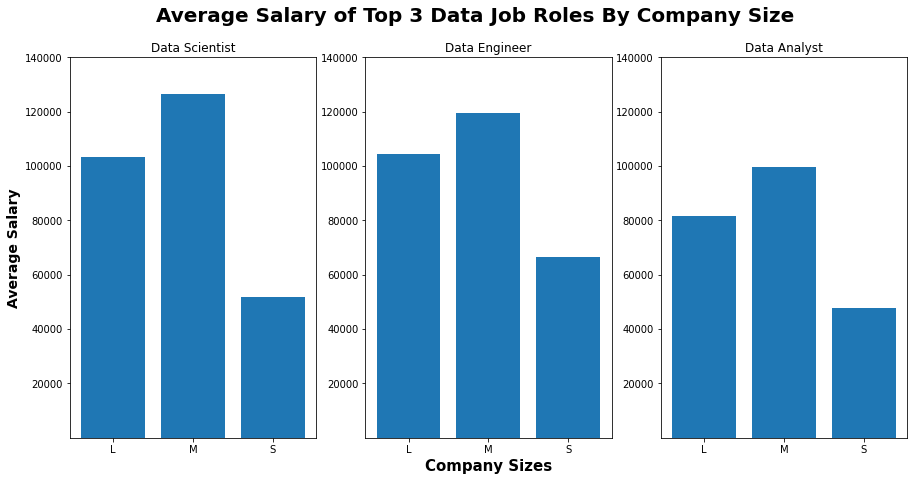

In [124]:
#Set the plot size and title
fig=plt.subplots(figsize=(15,7))
fig=plt.suptitle("Average Salary of Top 3 Data Job Roles By Company Size", fontweight='bold', fontsize='20')

#plot for Data Scientist
plt.subplot(1,3,1)
plt.bar(df_DS2.index,df_DS2['salary_in_usd'])

plt.yticks([20000,40000,60000,80000,100000,120000,140000])
plt.title("Data Scientist")
plt.ylabel("Average Salary", fontweight='bold', fontsize=14)

#plot for Data Egineer
plt.subplot(1,3,2)
plt.bar(df_DE2.index,df_DE2['salary_in_usd'])

plt.yticks([20000,40000,60000,80000,100000,120000,140000])
plt.title("Data Engineer")
plt.xlabel("Company Sizes", fontweight='bold', fontsize='15')


#plot for Data Analyst
plt.subplot(1,3,3)
plt.bar(df_DA2.index,df_DA2['salary_in_usd'])

plt.yticks([20000,40000,60000,80000,100000,120000,140000])
plt.title("Data Analyst")


plt.show()

In the above graphs, Medium-sized companies have the best opportunities for the top 3 data job roles salary-wise.